<a href="https://colab.research.google.com/github/benvictoria21/AnalyzeStocks/blob/master/nintendo_co_ltd_ntdoy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install  yfinance

     |████████████████████████████████| 5.5MB 6.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=0d5d9e2b6ff0eb7644a8a7ca5d76998400c3881baa918a8a46f5f295aaafa722
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader
import sqlite3
import yfinance

In [3]:
NTDOY = yfinance.download("NTDOY")

NTDOY

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-11-18,9.000000,9.000000,8.625000,9.000000,6.100809,81300
1996-11-19,9.000000,9.000000,8.625000,9.000000,6.100809,138100
1996-11-20,9.062500,9.250000,8.500000,9.062500,6.143176,56000
1996-11-21,9.000000,9.125000,8.562500,9.000000,6.100809,91700
1996-11-22,9.125000,9.250000,8.750000,9.125000,6.185543,200100
...,...,...,...,...,...,...
2020-11-19,66.150002,67.059998,65.019997,66.820000,66.820000,1564800
2020-11-20,66.889999,66.889999,65.750000,66.320000,66.320000,537300
2020-11-23,67.000000,67.070000,65.940002,66.339996,66.339996,762100


In [4]:
NTDOY.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-11-18,9.0000,9.000,8.6250,9.0000,6.100809,81300
1996-11-19,9.0000,9.000,8.6250,9.0000,6.100809,138100
1996-11-20,9.0625,9.250,8.5000,9.0625,6.143176,56000
1996-11-21,9.0000,9.125,8.5625,9.0000,6.100809,91700
1996-11-22,9.1250,9.250,8.7500,9.1250,6.185543,200100


In [5]:
NTDOY.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-11-19,66.150002,67.059998,65.019997,66.820000,66.820000,1564800
2020-11-20,66.889999,66.889999,65.750000,66.320000,66.320000,537300
2020-11-23,67.000000,67.070000,65.940002,66.339996,66.339996,762100
2020-11-24,66.279999,66.279999,65.610001,65.820000,65.820000,567600
2020-11-25,66.500000,66.989998,65.949997,66.599998,66.599998,846175


In [6]:
NTDOY.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6047.000000,6047.000000,6047.000000,6047.000000,6047.000000,6.047000e+03
mean,26.183905,26.501610,25.861381,26.194985,22.170024,2.103698e+05
std,15.882455,15.994209,15.745826,15.888899,14.778342,4.653783e+05
min,7.750000,8.000000,6.700000,7.750000,5.253475,0.000000e+00
25%,13.860000,14.000000,13.750000,13.865000,11.095300,3.400000e+04
50%,20.000000,20.500000,19.530001,20.000000,15.539374,8.840000e+04
75%,35.099998,35.500000,34.750000,35.189999,30.513601,2.425500e+05
max,78.500000,78.500000,77.599998,78.500000,72.699997,1.340180e+07


In [7]:
NTDOY.info

<bound method DataFrame.info of                  Open       High        Low      Close  Adj Close   Volume
Date                                                                      
1996-11-18   9.000000   9.000000   8.625000   9.000000   6.100809    81300
1996-11-19   9.000000   9.000000   8.625000   9.000000   6.100809   138100
1996-11-20   9.062500   9.250000   8.500000   9.062500   6.143176    56000
1996-11-21   9.000000   9.125000   8.562500   9.000000   6.100809    91700
1996-11-22   9.125000   9.250000   8.750000   9.125000   6.185543   200100
...               ...        ...        ...        ...        ...      ...
2020-11-19  66.150002  67.059998  65.019997  66.820000  66.820000  1564800
2020-11-20  66.889999  66.889999  65.750000  66.320000  66.320000   537300
2020-11-23  67.000000  67.070000  65.940002  66.339996  66.339996   762100
2020-11-24  66.279999  66.279999  65.610001  65.820000  65.820000   567600
2020-11-25  66.500000  66.989998  65.949997  66.599998  66.599998   

In [8]:
NTDOY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6047 entries, 1996-11-18 to 2020-11-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6047 non-null   float64
 1   High       6047 non-null   float64
 2   Low        6047 non-null   float64
 3   Close      6047 non-null   float64
 4   Adj Close  6047 non-null   float64
 5   Volume     6047 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 330.7 KB


In [9]:
NTDOY.Close

Date
1996-11-18     9.000000
1996-11-19     9.000000
1996-11-20     9.062500
1996-11-21     9.000000
1996-11-22     9.125000
                ...    
2020-11-19    66.820000
2020-11-20    66.320000
2020-11-23    66.339996
2020-11-24    65.820000
2020-11-25    66.599998
Name: Close, Length: 6047, dtype: float64

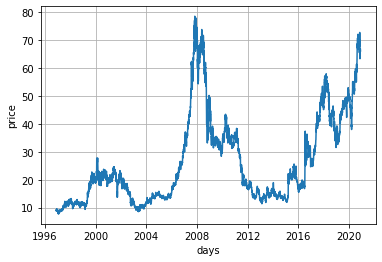

In [10]:
plt.xlabel("days")         
plt.ylabel("price")    
plt.grid()              
plt.plot(NTDOY.Close)

In [11]:
NTDOY.High

Date
1996-11-18     9.000000
1996-11-19     9.000000
1996-11-20     9.250000
1996-11-21     9.125000
1996-11-22     9.250000
                ...    
2020-11-19    67.059998
2020-11-20    66.889999
2020-11-23    67.070000
2020-11-24    66.279999
2020-11-25    66.989998
Name: High, Length: 6047, dtype: float64

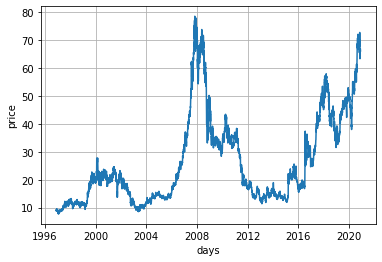

In [12]:
plt.xlabel("days")        
plt.ylabel("price")   
plt.grid()              
plt.plot(NTDOY.Close)

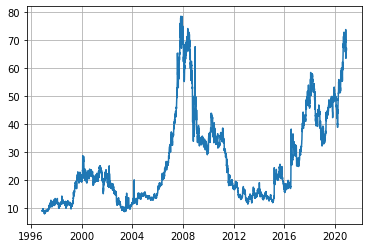

In [13]:
plt.plot(NTDOY.High)
plt.grid()

In [14]:
NTDOY.shape

(6047, 6)

In [15]:
NTDOY.Open

Date
1996-11-18     9.000000
1996-11-19     9.000000
1996-11-20     9.062500
1996-11-21     9.000000
1996-11-22     9.125000
                ...    
2020-11-19    66.150002
2020-11-20    66.889999
2020-11-23    67.000000
2020-11-24    66.279999
2020-11-25    66.500000
Name: Open, Length: 6047, dtype: float64

6047


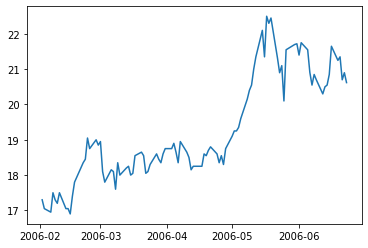

In [16]:
print(len(NTDOY.Close))
las100_days = NTDOY.High[2316:2415]
plt.plot(las100_days)

In [17]:
NTDOY.Close

Date
1996-11-18     9.000000
1996-11-19     9.000000
1996-11-20     9.062500
1996-11-21     9.000000
1996-11-22     9.125000
                ...    
2020-11-19    66.820000
2020-11-20    66.320000
2020-11-23    66.339996
2020-11-24    65.820000
2020-11-25    66.599998
Name: Close, Length: 6047, dtype: float64

In [18]:
NTDOY.Volume

Date
1996-11-18      81300
1996-11-19     138100
1996-11-20      56000
1996-11-21      91700
1996-11-22     200100
               ...   
2020-11-19    1564800
2020-11-20     537300
2020-11-23     762100
2020-11-24     567600
2020-11-25     846175
Name: Volume, Length: 6047, dtype: int64